In [1]:
options(repr.plot.width=8, repr.plot.height=5)
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Questions from Piazza and the exit poll
- "I am still really confused about `ungroup()`
- "Printing ipynb to PDF sucks" (paraphrased)

In [33]:
library(nycflights13)
group_by(flights, month, year) %>% summarize(n=n()) %>% ungroup %>% summarize(m = max(n))

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


m
<int>
29425


# Lecture 4: Tidy Data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand what makes [tidy data](#Tidy-data) and why we care
* Make data wider and narrower
    
This lecture note corresponds to Chapter 6 of your book. 
</div>


    




So far in this class, we have learned how to use tools like `dplyr` and `ggplot` to manipulate and plot data. You may not have realized it, but the reason why it has been relatively easy to apply these tools to datasets like `nycflights13` is because all of the datasets we have examined have been in a special format. Today we will study that format in greater detail.

## Data in the real world
Unfortunately, most datasets in the real world do *not* come in a format which we can immediately load into R and analyze with tidyverse. [Here is a typical example](https://docs.google.com/spreadsheets/d/1AjOaPNJq-6AhHsbPqfExd_U5ENBYxKSJptahCMkKx9U/edit?usp=sharing) of a real-world dataset:

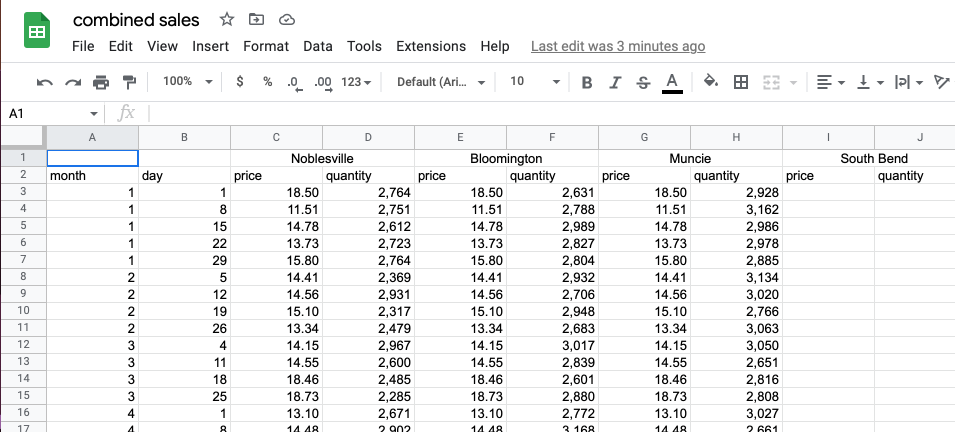

To analyze this data, we need it to look like:

    # A tibble: 194 x 6
        year month   day location    price quantity
       <dbl> <dbl> <dbl> <chr>       <dbl>    <dbl>
     1  2016     1     1 Bloomington  18.5    2631.
     2  2016     1     1 Muncie       18.5    2928.
     3  2016     1     1 Noblesville  18.5    2764.
     4  2016     1     8 Bloomington  11.5    2788.
     5  2016     1     8 Muncie       11.5    3162.
     6  2016     1     8 Noblesville  11.5    2751.
     7  2016     1    15 Bloomington  14.8    2989.
     8  2016     1    15 Muncie       14.8    2986.
     9  2016     1    15 Noblesville  14.8    2612.
    10  2016     1    22 Bloomington  13.7    2827.
    # ... with 184 more rows
    
This week we'll learn how to convert real-world data into an analyzable format, a process known as "tidying".

## Tidy data
There are many different ways to represent data in a table, but some are better than others.
We say that a data table is "[tidy](http://vita.had.co.nz/papers/tidy-data.pdf)" if:
- Each row represents an observation.
- Each column represents a variable.
- Each value gets its own cell.
- Each different type of data set gets its own table.

Data tables which are not tidy are called messy!
![http://r4ds.had.co.nz/images/tidy-1.png](http://r4ds.had.co.nz/images/tidy-1.png)

In the following, we are going to ouput several tables data.  These `table` data are part of your `tidyverse` package.

`table1` is a "tidy" dataset:

In [35]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In the above data set, each column is a variable and every entries in the same column is of the same type. So therefore this data set is tidy.

Now let us take a look at the following data set obtained by merging the cases and population into the `type` variable.

Now let as look at a different version of `table1` which contains the same data:

In [10]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


Is `table2` tidy? In the type column, you have two variables: cases and population.   For data to be tidy, each variable needs to be in each column.  So this data is messy.

How about the following table? 

In [12]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


The above table is also messy, because the counts for cases and population is defined as a division in the variable rate.  So this data is also messy, though arguably less so

In [43]:
print(table4a) # cases in one tibble
print(table4b) # population in another one

# A tibble: 3 × 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766
# A tibble: 3 × 3
  country         `1999`     `2000`
* <chr>            <int>      <int>
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583


The above is a messy data, since each observation for different year is separated into columns. The data have also been split into two tables. This is not necessarily a messy thing to do, as we will see when we talk about relational data.

Recapping: tidy data means

* each observation has its own row
* each variable has its own column
* each value has its own cell

## Why we care about tidy data
- The tools we have learned so far all live in the `tidyverse`. 
- Why is it called by this funny name? It is a universe of R packages which all expect to recieve tidy data as input, and, where necessary, return tidy data as output. 
- You can think of tidy data as a sort of contract that everything in `tidyverse` respects. 
- In particular, this makes it possible to string many tidyverse commands together using `%>%`  without having to worry about whether they are all compatible.

For instance, let us calculate rate of cases per 10000 people for the data in `table1`.

In [44]:
table1 %>% mutate(rate = cases / population * 10000) # rate of cases per 10000 people

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


How would we calculate the `rate` variable using `table2`? 

In [12]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [13]:
#  mutate(table2, rate=???)  not possible to use mutate

Summary commands like `summarize` and `count` also preserve tidy data:

In [14]:
count(table1, year, wt = cases) # compute no. of cases for each year

year,n
<int>,<int>
1999,250740
2000,296920


`ggplot` also expects tidy data.  What if we plot a table with a messy data?

In [18]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


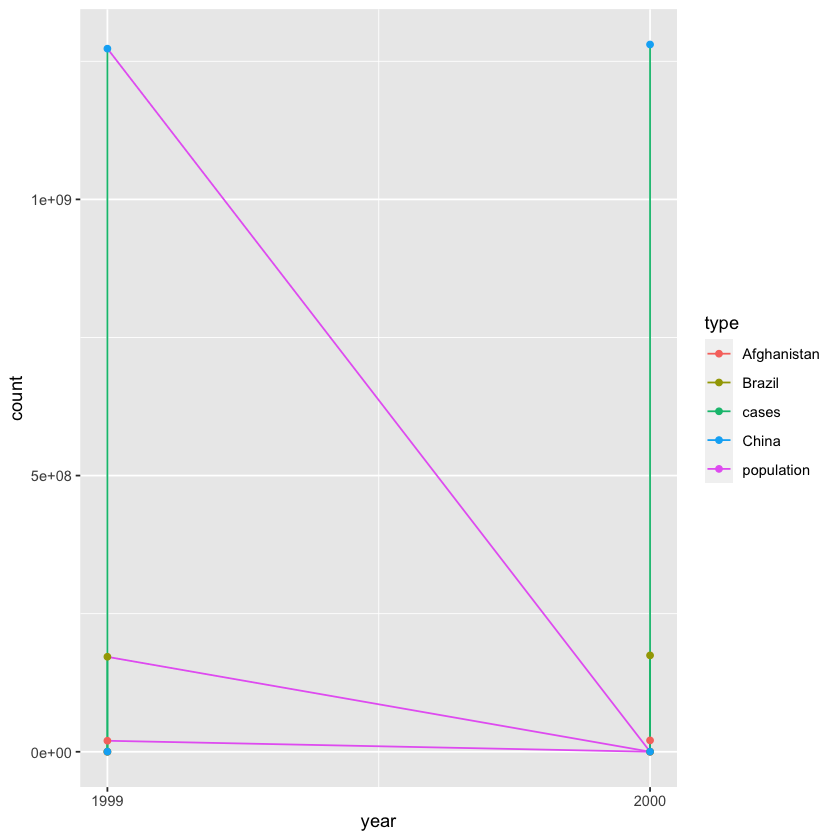

In [17]:
ggplot(table2, aes(x=year, y=count, color=type)) +
    geom_line(aes(group = country)) +
    geom_point(aes(color = country)) +
    scale_x_continuous(breaks=c(1999, 2000))

## Creating tidy data
If the data is not already tidy, then we might need to some work before we can use the tools in `dplyr`. The package `tidyr` inside `tidyverse` allows one to convert data into the tidy data.

### Making data longer
One common problem in when a variable is spread across multiple columns and we need to gather those columns to create a new pair of variables. For example, consider `table4a` from above:

In [46]:
print(table4a)

# A tibble: 3 × 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


Here there is a year variable which is spread across two columns. To become tidy, it should get its own `year` column. We want to make the data *longer* by taking the year columns and combining them into one column:
![gather illustration](http://r4ds.had.co.nz/images/tidy-9.png)

The command to do this is called `pivot_longer()`. To use it, we need to tell R three things:

* which existing columns correspond to values of a variable
* what is the name of the variable (the **key**) whose values currently appear as column names.
* what is the name of the variable (the **value**) whose values are currently spread over the cells.

(When using `pivot_longer()`, neither the **key** nor **value** column names currently exist in your data. They are "destination" columns in the new table.)

In [63]:
# relig_income %>% 
#    pivot_longer(!religion, names_to = "income", values_to = "count")

colnames(table4a)

# help(pivot_longer)

[1] "country" "1999"    "2000"

Notice how R chose default names "name" and "value" for the new columns it created. We can change those to be more informative using the options `names_to=` and `values_to=`:

In [11]:
# pivot table4a with informative column names

### Exercise
Let us try to transform `table4b` to tidy format:

In [64]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


In [15]:
# pivot table4b to long format

## Wider data
Another type of problem is when an observation is scattered across multiple rows. Here we want to do the opposite of gather: we want to make the data **wider** by spreading these rows out into new columns.
![spread data](http://r4ds.had.co.nz/images/tidy-8.png)

The command to do this is called `pivot_wider`. To use it we need to specify two things:

* which existing column has the variable **names**
* which existing column has the **values** for those variables

### Exercise
Convert `table2` to tidy format using `pivot_wider()`. 

In [75]:
# fish_encounters %>% 
#    pivot_wider(names_from = station, values_from = seen)

table2 %>% slice(3:12) %>%  pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [54]:
# make table2 wider by separating cases and population into different columns

## Summary

* `pivot_longer` tends to make wide tables narrower and longer
* `pivot_wider` tends to make long tables shorter and wider
* They are inverses -- each one undos the other.

Another use for these commands is to create data in a format that is better for humans to read. 
Some tables are more readable if they are put in a non-tidy format. This is often the case with time data.

### Exercise
Re-create the following table which shows monthly departures from the three NYC airports:
```
  origin 1    2    3     4     5     6     7     8     9    10    11   12  
1 EWR    9893 9107 10420 10531 10592 10175 10475 10359 9550 10104 9707 9922
2 JFK    9161 8421  9697  9218  9397  9472 10023  9983 8908  9143 8710 9146
3 LGA    7950 7423  8717  8581  8807  8596  8927  8985 9116  9642 8851 9067
```

In [85]:
# # spread nycflights out to show departures by month for each airport
# library(nycflights13)

# flights %>% count(origin, month) %>% 
#     mutate(month = month.abb[month]) %>% 
#     pivot_wider(names_from = month, values_from = n) 

month.abb[flights$month] %>% head

[1] "Jan" "Jan" "Jan" "Jan" "Jan" "Jan"

## Example: `gapminder`
`gapminder` is a library of socioeconomic data collected over time and across many different countries:

In [86]:
# install.packages('gapminder')
library(gapminder)
gapminder %>% print

# A tibble: 1,704 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 1,694 more rows


These data are in tidy format. We can easily do things like plot population over time (for example):

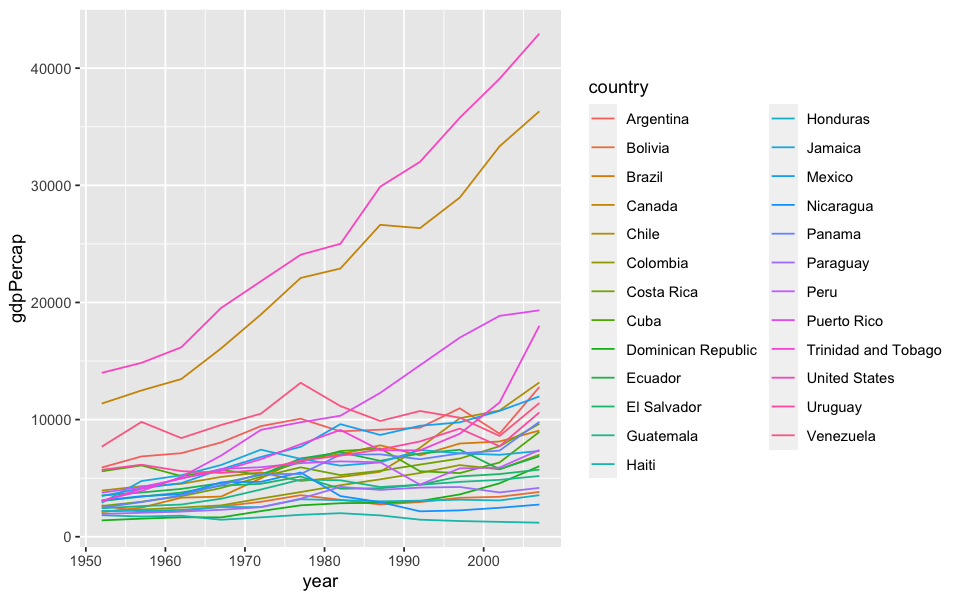

In [87]:
gapminder %>% filter(continent == "Americas") %>% 
    ggplot(aes(x=year, y=gdpPercap, color=country)) + geom_line()

With lots of different countries, it is (arguably) easier to present these data in tabular form. To do this, we need to untidy the data and place years along the horizontal axis:

    # A tibble: 142 × 13
       country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
       <fct>    <int>  <int>  <int>  <int>  <int>  <int>  <int>  <int>  <int>  <int>
     1 Afghan… 8.43e6 9.24e6 1.03e7 1.15e7 1.31e7 1.49e7 1.29e7 1.39e7 1.63e7 2.22e7
     2 Albania 1.28e6 1.48e6 1.73e6 1.98e6 2.26e6 2.51e6 2.78e6 3.08e6 3.33e6 3.43e6
     3 Algeria 9.28e6 1.03e7 1.10e7 1.28e7 1.48e7 1.72e7 2.00e7 2.33e7 2.63e7 2.91e7
     4 Angola  4.23e6 4.56e6 4.83e6 5.25e6 5.89e6 6.16e6 7.02e6 7.87e6 8.74e6 9.88e6
     5 Argent… 1.79e7 1.96e7 2.13e7 2.29e7 2.48e7 2.70e7 2.93e7 3.16e7 3.40e7 3.62e7
     6 Austra… 8.69e6 9.71e6 1.08e7 1.19e7 1.32e7 1.41e7 1.52e7 1.63e7 1.75e7 1.86e7
     7 Austria 6.93e6 6.97e6 7.13e6 7.38e6 7.54e6 7.57e6 7.57e6 7.58e6 7.91e6 8.07e6
     8 Bahrain 1.20e5 1.39e5 1.72e5 2.02e5 2.31e5 2.97e5 3.78e5 4.55e5 5.29e5 5.99e5
     9 Bangla… 4.69e7 5.14e7 5.68e7 6.28e7 7.08e7 8.04e7 9.31e7 1.04e8 1.14e8 1.23e8
    10 Belgium 8.73e6 8.99e6 9.22e6 9.56e6 9.71e6 9.82e6 9.86e6 9.87e6 1.00e7 1.02e7 
    # … with 132 more rows, and 2 more variables: `2002` <int>, `2007` <int>

In [91]:
gapminder %>% select(country, year, gdpPercap)  %>% 
    pivot_wider(names_from = year, values_from = gdpPercap)

country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,779.4453,820.8530,853.1007,836.1971,739.9811,786.1134,978.0114,852.3959,649.3414,635.3414,726.7341,974.5803
Albania,1601.0561,1942.2842,2312.8890,2760.1969,3313.4222,3533.0039,3630.8807,3738.9327,2497.4379,3193.0546,4604.2117,5937.0295
Algeria,2449.0082,3013.9760,2550.8169,3246.9918,4182.6638,4910.4168,5745.1602,5681.3585,5023.2166,4797.2951,5288.0404,6223.3675
Angola,3520.6103,3827.9405,4269.2767,5522.7764,5473.2880,3008.6474,2756.9537,2430.2083,2627.8457,2277.1409,2773.2873,4797.2313
Argentina,5911.3151,6856.8562,7133.1660,8052.9530,9443.0385,10079.0267,8997.8974,9139.6714,9308.4187,10967.2820,8797.6407,12779.3796
Australia,10039.5956,10949.6496,12217.2269,14526.1246,16788.6295,18334.1975,19477.0093,21888.8890,23424.7668,26997.9366,30687.7547,34435.3674
Austria,6137.0765,8842.5980,10750.7211,12834.6024,16661.6256,19749.4223,21597.0836,23687.8261,27042.0187,29095.9207,32417.6077,36126.4927
Bahrain,9867.0848,11635.7995,12753.2751,14804.6727,18268.6584,19340.1020,19211.1473,18524.0241,19035.5792,20292.0168,23403.5593,29796.0483
Bangladesh,684.2442,661.6375,686.3416,721.1861,630.2336,659.8772,676.9819,751.9794,837.8102,972.7700,1136.3904,1391.2538


## Making wide data using more than one column
Consider the following simple table.

In [67]:
grades <- tribble(
    ~person, ~exam, ~q1, ~q2, ~q3,
    "alice", "mt1", 1, 2, 3.5,
    "alice", "mt2", .5, 2.5, 1.5,
    "bob", "mt1", 0.0, 1.0, 1.5,
    "bob", "mt2", 1.5, 2.5, 2.0
)

In [68]:
print(grades)

# A tibble: 4 × 5
  person exam     q1    q2    q3
  <chr>  <chr> <dbl> <dbl> <dbl>
1 alice  mt1     1     2     3.5
2 alice  mt2     0.5   2.5   1.5
3 bob    mt1     0     1     1.5
4 bob    mt2     1.5   2.5   2  


Suppose we want to expand this into multiple columns `q1_mt1`, `q2_mt2`, and so on. How should we use `pivot_wider()`?

In [ ]:
# spread using multiple values

## Some untidy examples
The `untidydata` package contains examples of untidy datasets:

In [93]:
# install.packages("untidydata") won't work! instead use:
# remotes::install_github("jvcasillas/untidydata")
# (if you get an error, you need to `install.packages("remotes")` first)
library(untidydata)

In [103]:
language_diversity %>% pivot_wider(names_from = Measurement, values_from = Value)

Continent,Country,Langs,Area,Population,Stations,MGS,Std
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,18,2381741,25660,102,6.60,2.29
Africa,Angola,42,1246700,10303,50,6.22,1.87
Oceania,Australia,234,7713364,17336,134,6.00,4.17
Asia,Bangladesh,37,143998,118745,20,7.40,0.73
Africa,Benin,52,112622,4889,7,7.14,0.99
Americas,Bolivia,38,1098581,7612,48,6.92,2.50
Africa,Botswana,27,581730,1348,10,4.60,1.69
Americas,Brazil,209,8511965,153322,245,9.71,5.87
Africa,Burkina Faso,75,274000,9242,6,5.17,1.07


## &#129300; Quiz

The `language_diversity` dataset is:

<ol style="list-style-type: upper-alpha;">
    <li>Tidy!</li>
    <li>Untidy, because some rows represent multiple observations.</li>
    <li>Untidy, because some columns do not represent variables.</li>
    <li>Untidy, because some cells contain more than one value.</li>
    <li>Untidy for some other reason.</li> 
</ol>

In [ ]:
How should we go about tidying up this dataset?

## &#129300; Quiz

The measurements in `language_diversity` include:

<ol style="list-style-type: upper-alpha;">
    <li>Area</li>
    <li>Population</li>
    <li>Langs</li>
    <li>MGS</li>
    <li>Std</li> 
</ol>

In [ ]:
# tidy the language diversity dataset

## Example: Climate data

The [Global Historical Climate Network](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) is amazing database of daily weather data going back, in some cases, >100 years. I downloaded daily observation data for Ann Arbor from 1991 to present:

In [109]:
# load(url("https://datasets.stats306.org/a2weather.RData"))
colnames(a2weather)

[1] "id"      "year"    "month"   "element" "VALUE1"  "MFLAG1"  "QFLAG1" 
  [8] "SFLAG1"  "VALUE2"  "MFLAG2"  "QFLAG2"  "SFLAG2"  "VALUE3"  "MFLAG3" 
 [15] "QFLAG3"  "SFLAG3"  "VALUE4"  "MFLAG4"  "QFLAG4"  "SFLAG4"  "VALUE5" 
 [22] "MFLAG5"  "QFLAG5"  "SFLAG5"  "VALUE6"  "MFLAG6"  "QFLAG6"  "SFLAG6" 
 [29] "VALUE7"  "MFLAG7"  "QFLAG7"  "SFLAG7"  "VALUE8"  "MFLAG8"  "QFLAG8" 
 [36] "SFLAG8"  "VALUE9"  "MFLAG9"  "QFLAG9"  "SFLAG9"  "VALUE10" "MFLAG10"
 [43] "QFLAG10" "SFLAG10" "VALUE11" "MFLAG11" "QFLAG11" "SFLAG11" "VALUE12"
 [50] "MFLAG12" "QFLAG12" "SFLAG12" "VALUE13" "MFLAG13" "QFLAG13" "SFLAG13"
 [57] "VALUE14" "MFLAG14" "QFLAG14" "SFLAG14" "VALUE15" "MFLAG15" "QFLAG15"
 [64] "SFLAG15" "VALUE16" "MFLAG16" "QFLAG16" "SFLAG16" "VALUE17" "MFLAG17"
 [71] "QFLAG17" "SFLAG17" "VALUE18" "MFLAG18" "QFLAG18" "SFLAG18" "VALUE19"
 [78] "MFLAG19" "QFLAG19" "SFLAG19" "VALUE20" "MFLAG20" "QFLAG20" "SFLAG20"
 [85] "VALUE21" "MFLAG21" "QFLAG21" "SFLAG21" "VALUE22" "MFLAG22" "QFLAG22"
 [92] "SFLAG22" "VALUE23" "MFLAG23" "QFLAG23" "SFLAG23" "VALUE24" "MFLAG24"
 [99] "QFLAG24" "SFLAG24" "VALUE25" "MFLAG25" "QFLAG25" "SFLAG25" "VALUE26"
[106] "MFLAG26" "QFLAG26" "SFLAG26" "VALUE27" "MFLAG27" "QFLAG27" "SFLAG27"
[113] "VALUE28" "MFLAG28" "QFLAG28" "SFLAG28" "VALUE29" "MFLAG29" "QFLAG29"
[120] "SFLAG29" "VALUE30" "MFLAG30" "QFLAG30" "SFLAG30" "VALUE31" "MFLAG31"
[127] "QFLAG31" "SFLAG31"

Questions about these data:
- What do the columns mean? What are the units? How can we find this information out?
- What questions can we ask about these data?
  - Are the data in an appropriate format to answer these questions?
  - If not, how can we get them there?

In [75]:
# analysis of a2weather